In [1]:
#conda install -c anaconda ephem

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2020.11=py38_0
  - defaults/noarch::qtconsole==4.7.7=py_0
  - defaults/noarch::jupyter_client==6.1.7=py_0
  - defaults/noarch::seaborn==0.11.0=py_0
  - defaults/osx-64::conda-build==3.20.5=py38_1
  - defaults/noarch::jupyter_console==6.2.0=py_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py38_0
  - defaults/osx-64::distributed==2.30.1=py38hecd8cb5_0
  - defaults/noarch::ipywidgets==7.5.1=py_1
  - defaults/noarch::nbclient==0.5.1=py_0
  - defaults/osx-64::terminado==0.9.1=py38_0
  - defaults/osx-64::scikit-image==0.17.2=py38h81aa140_0
  - defaults/osx-64::widgetsnbextension==3.5.1=py38_0
  - defaults/osx-64::anaconda-navigator==1.10.0=py38_0
  - defaults/osx-64::spyder-kernels==1.9.4=py38_0
  - defaults/osx-64::bokeh==2.2.3=py38_0
  - defaults/noarch:

In [2]:
#conda install -c conda-forge pystan

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/wangshuyuan/opt/anaconda3

  added / updated specs:
    - pystan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.12.0               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    ca-certificates-2022.5.18.1|       h033912b_0         145 KB  conda-forge
    cctools-949.0.1            |       h22b1bf0_0          16 KB  conda-forge
    cctools_osx-64-949.0.1     |       h5ba7a2e_0         1.8 MB  conda-forge
    certifi-2022.5.18.1        |   py38h50d1736_0         150 KB  conda-forge
    cftime-1.6.0               |   py38h4221b65_0         198 KB  conda-forge
    clang-9.0.1                |default_hf57f61e_0

In [3]:
#conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/wangshuyuan/opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    clang-10.0.1               |default_hf57f61e_1        12.1 MB  conda-forge
    clang_osx-64-10.0.1        |      h05bbb7f_10          15 KB  conda-forge
    clangxx-10.0.1             |default_hf57f61e_1         123 KB  conda-forge
    clangxx_osx-64-10.0.1      |      h05bbb7f_10          15 KB  conda-forge
    compiler-rt-10.0.1        

In [3]:
#!pip install --upgrade plotly

     |████████████████████████████████| 15.2 MB 1.4 MB/s eta 0:00:01


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


# Car sales dataset

The monthly car sales dataset is a univariate time series dataset that contains both a trend and seasonality. The dataset has 108 months of data.

## Load data

In [7]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [9]:
df.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


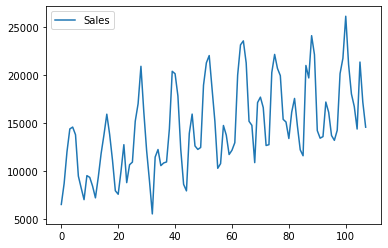

In [12]:
df.plot()
plt.show()

# Forecast car sales with Prophet

## Fit Prophet model
To use Prophet, a Prophet() object needs to be defined first. And then it's fit on the dataset by calling the fit() method.

The Prophet() object takes arguments to configure the model, such as the type of growth, the type of seasonality, etc. By default, the model will figure out almost everything automatically.

The fit() method takes a DataFrame of time series data. The DataFrame must have a specific format:
- The first column must have the name `ds` and contain the date-times. The column must be converted to date-time object.
- The second column must have the name `y` and contain the observation.

In [14]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [17]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Make an in-sample forecast

In-sample means in training set sample. Although it's not the case in real-life scenario, in-sample forecast can give insight abou thow good the model is - how well it learned the training data.

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named `ds` and rows with date-times for all the invervals to be predicted.

In [20]:
future = []
for i in range(1,13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
future

,ds
0,1968-01-01
1,1968-02-01
2,1968-03-01
3,1968-04-01
4,1968-05-01
5,1968-06-01
6,1968-07-01
7,1968-08-01
8,1968-09-01
9,1968-10-01


In [23]:
forecast = model.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14363.556656  12846.277549  15998.711024
1 1968-02-01  14929.449809  13383.664423  16432.413876
2 1968-03-01  20893.417179  19296.423974  22514.055690
3 1968-04-01  22910.515245  21321.802126  24484.874309
4 1968-05-01  24200.784363  22591.542355  25733.098075


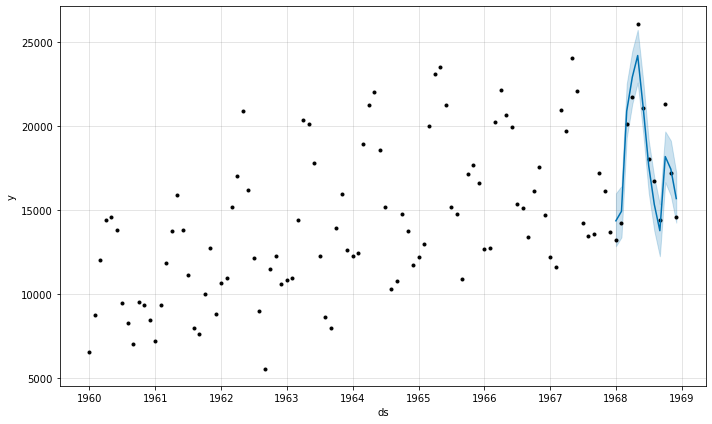

In [24]:
model.plot(forecast)
plt.show()

The training data are represented as black dots and the forecast is a blue line with upper and lower bounds in blue shaded area.

We can see that the forecasted 12 months is a good match for the real observations.

# Make out-of-sample forecast

In [25]:
future = []
for i in range(1,13):
    date = '1969-%02d'%i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
future.head()

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01


In [26]:
forecast = model.predict(future)
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15430.055568  13794.844086  17127.971585
1 1969-02-01  16206.859137  14570.322611  17801.358186
2 1969-03-01  21407.960484  19834.745466  22916.643981
3 1969-04-01  23530.369039  22062.137105  25078.796023
4 1969-05-01  25036.901537  23443.170548  26520.667802


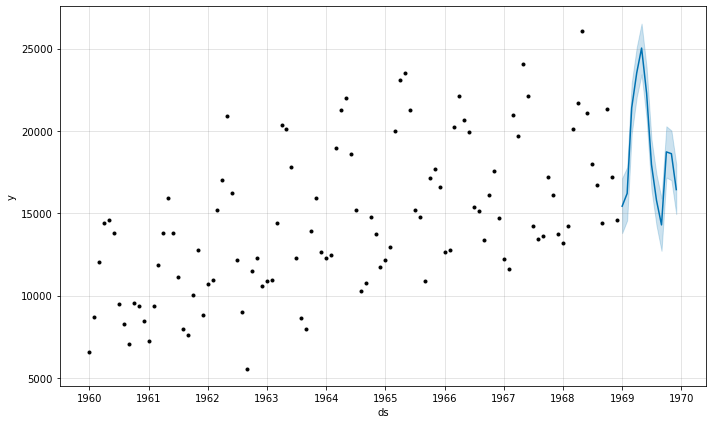

In [27]:
model.plot(forecast)
plt.show()

The out-of-sample one-year forecast looks sensible.

# Manually evaluate forecast model

Hold some data back from the model, and then fit the model on the first portion of the data, use it to make predictions on the held-back portion, and calculate an error measure. 

In [28]:
# create training data by removing the last 12 months
train = df.drop(df.index[-12:])
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [29]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
future = []
for i in range(1,13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [32]:
from sklearn.metrics import mean_absolute_error

y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.814


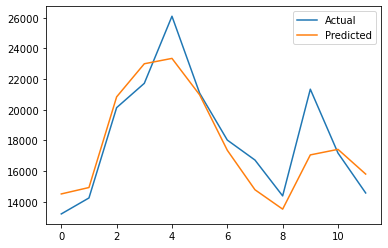

In [33]:
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.show()